# Estudio del subárbol Phenotypic abnormality en HPO

## 1. Profundidad
Resumen:  
Tamaño: 90978 fenotipos, Profundidad máxima: 15, Media: 8.68.
Plot de dispersión abajo.  
csv en [./results](./results)

In [17]:
# Pasos:
# 1. Cargar la ontología HPO
# 2. Obtener subárbol Phenotypic abnormality
# 3. Obtener tamaño N
# 4. Obtener conteo de las profundidades de los nodos del subárbol
# 5. Para cada T = 10%N, 20%N, ..., 100%N:
# a. Obtener la profundidad media de los T primeros nodos del subárbol
# 6. Plot de dispersión de la profundidad media vs. T

from pyhpo import Ontology

PATH_ONTO = "../pubmed-queries/hpo-22-12-15-data"

onto = Ontology(PATH_ONTO)
rDir = 'results'

# 2. Phenotypic abnormality childs
pha = onto.get_hpo_object('HP:0000118')

# 3 & 4

N = 0
h = 0
MAXDEPTH = 15

# Array de profundidades: de 0 a MAX_DEPTH

contProfundidades = [0] * (MAXDEPTH + 1)
sAux = [[pha,0]]

while not sAux == []:
    nodo = sAux.pop()
    p = nodo[0]
    d = nodo[1]
    N = N + 1
    contProfundidades[d] = contProfundidades[d] + 1
    if d > h:
        h = d
    if p.children:
        for c in p.children:
            sAux.append([c,d+1])

print("N = ", N)
print("Max depth = ", h)

# Save depth count
f = open(rDir + '/depth_count.csv', 'w')
f.write('depth\tcount\n')
for i in range(h+1):
    f.write(str(i) + '\t' + str(contProfundidades[i]) + '\n')
f.close()


N =  90978
Max depth =  15


[1, 23, 156, 864, 2569, 5417, 7196, 9618, 14587, 15499, 14286, 11598, 6956, 2038, 133, 37]
[0, 1, 24, 180, 1044, 3613, 9030, 16226, 25844, 40431, 55930, 70216, 81814, 88770, 90808, 90941, 90978]


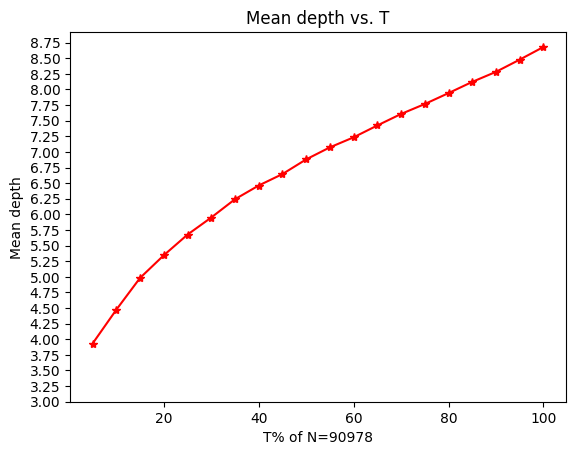

In [20]:
# 5. Para cada T = 10%N, 20%N, ..., 100%N:
# a. Obtener la profundidad media de los T primeros nodos del subárbol

# Array sumas acumuladas de contProfundidades

accumDepth = [0] * (MAXDEPTH + 2)
for i in range(1,MAXDEPTH+2):
    accumDepth[i] = accumDepth[i-1] + contProfundidades[i-1]

print(contProfundidades)
print(accumDepth)

step = 5
nsteps = 100//step
meanDepth = [0] * nsteps

for j in range(0, nsteps):
    sum = 0
    T = (j+1)*step/100
    acum = 0
    i = 0
    k = 0
    while acum < T*N:
        if acum + contProfundidades[i] > T*N:
            k = T*N - acum
            sum = sum + k*i
            acum = T*N
        else:
            sum = sum + contProfundidades[i]*i
            acum = acum + contProfundidades[i]
        i = i + 1
        
    #print("T = ", T, " profundidad media total = ", sum/(T*N))
    meanDepth[j] = sum/(T*N)

# 6. Plot de dispersión de la profundidad media vs. T

import matplotlib.pyplot as plt
import numpy as np

T = np.arange(step,100+step,step)
plt.plot(T, meanDepth, 'r')
plt.plot(T, meanDepth, 'r*')
plt.xlabel(f'T% of N={N}')
plt.ylabel('Mean depth')
plt.yticks(np.arange(int(meanDepth[0]), int(meanDepth[-1])+1, 0.25))
plt.title('Mean depth vs. T')
plt.show()

# Save mean depth
import pandas as pd
df = pd.DataFrame({'T': T, 'Mean depth': meanDepth})
df.to_csv(rDir + '/mean_depth.csv', index=False)
